## Exercise 1:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

red_data = np.loadtxt('winequality-red.csv', delimiter=';', skiprows=1)
white_data  = np.loadtxt('winequality-white.csv', delimiter=';', skiprows=1)

w_qualities = white_data[:,11]
r_qualities = red_data[:,11]

Exercise 2:

<Container object of 7 artists>

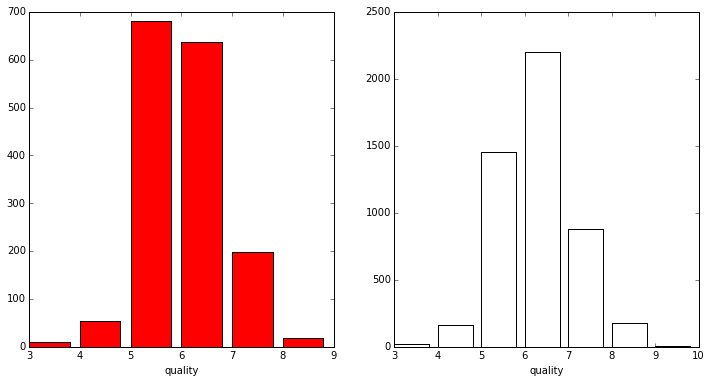

In [2]:
#Obtain quality ranges and counts
w_quality_range, w_counts = np.unique(w_qualities, return_counts=True)
r_quality_range, r_counts = np.unique(r_qualities, return_counts=True)

#Plot qualities for both white and red wine

%matplotlib inline
fig = plt.figure(figsize=(12,6))
ax1 = fig.add_subplot(121)
ax1.set_xlabel('quality')
plt.bar(r_quality_range, r_counts, color='r')

ax2 = fig.add_subplot(122)
ax2.set_xlabel('quality')
plt.bar(w_quality_range, w_counts, color='w')

Exercise 3:

Exercise 4 (Linear Regression):

(a) Randomly Select 30% of red wine data for testing, and 70% for training

In [19]:
#np.random.seed(0)
features = red_data[:,:11]
Features = np.hstack((np.ones_like(features[:,:1]), features))
target = red_data[:,11]

#Obtain how many rows we need for training
n_train_rows = np.floor((red_data.shape[0] * 0.7))
#Choose a random set of row numbers to use as training data
train_rows_nums = np.random.choice(red_data.shape[0], n_train_rows, replace=False)
#Extract training data
train_data = red_data[train_rows_nums]
#The rest are test data
test_data = np.delete(red_data, train_rows_nums, axis=0)

(1599, 11)


(b) Fit a linear regression to the training data

In [4]:
x = train_data[:,:11]
y = train_data[:,11]

#Work out optimal value of w
X = np.hstack((np.ones_like(x[:,:1]), x))
w = np.linalg.solve(np.dot(X.T, X), np.dot(X.T, y))

(c) Make a scatter plot the predictions versus the true targets for the test set and compute the
mean squared error on the test set

0.418030937867


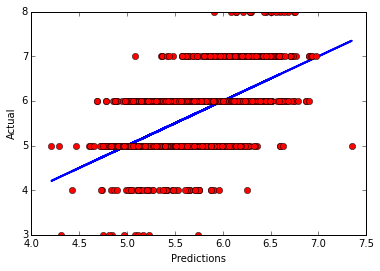

In [5]:
actual = target

predictions = np.dot(Features, w)
plt.plot(predictions, predictions, 'b-', linewidth=2)
plt.plot(predictions, actual, 'ro')
plt.xlabel('Predictions')
plt.ylabel('Actual')

msqErr = ((actual - predictions)**2).mean()
print(msqErr)

(d) Suggest a benchmark that you could use to decide if this mean squared error value is good.

Mean squared error is a relative measurement, so the only way to decide if it's "good" is to compare it against the MSE of another model. We'll calculate the MSE of the linear regression model with no training (the MSE will clrearly be higher due to fitting for the entire data set), and then calculate the 

(e) Implement your benchmark

In [6]:
#Work out optimal value of w
w = np.linalg.solve(np.dot(Features.T, Features),
                    np.dot(Features.T, target))
actual = target
predictions = np.dot(Features, w)
msq = ((actual - predictions)**2).mean()
print(msq)

0.416767167221


(f) Briefly discuss the linear regression performance with respect to the benchmark.

5. Regularised linear regression:

(a) Implement regularised least squares and make a plot of the test performance versus the
regularisation parameter.

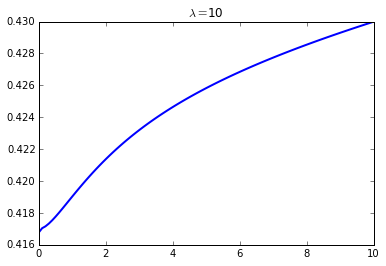

In [24]:
msqes = []
lambs = np.linspace(0.0, 10.0, num=100)
dims = Features.shape[1]
for lamb in lambs:
    w = np.linalg.solve(np.dot(Features.T, Features) + lamb*np.identity(dims),
                        np.dot(Features.T, target))
    f_test = np.dot(Features, w)
    actual = target
    msq = ((actual - f_test)**2).mean()
    msqes.append(msq)
    
plt.figure()
plt.plot(lambs, msqes,'b-',linewidth=2)
plt.title(title)

(b) Describe why this is not a good way of determining the value of the regularisation
parameter.

Minimising on just the test data is overfitting 